In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
import warnings
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join
from IPython import display
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score # и другие метрики
from sklearn.cluster import KMeans # а также другие алгоритмы
from sklearn.preprocessing import StandardScaler

In [68]:
!ls

X.tsv		analysis2.ipynb  strategies_freqs  y.tsv
analysis.ipynb	dolgolets.tsv	 students.tsv


In [69]:
students = pd.read_csv('students.tsv',sep='\t' )
dolgolets = pd.read_csv('dolgolets.tsv', sep = '\t')

In [70]:
students.columns = ['ID', 'квота сек', 'Слово', 'Предыдущее + слово', 'Первая_буква',
       'Стратегия', 'Порядок_буква', 'Порядок_весь_тест', 'Частотность',
       'Пауза', 'VP', 'VS', 'N of words', 'N of words_P', 'N of words_O',
       'N of words_S', 'Mean pause']

In [71]:
dolgolets.columns



Index(['ID', 'Gender', 'Age', 'квота сек', 'Слово', 'Предыдущее + слово',
       'Стратегия', 'Первая_буква', 'Порядок_буква', 'Порядок_весь_тест',
       'Частотность', 'Пауза', 'VP', 'VS', 'N of words', 'N of words_P',
       'N of words_O', 'N of words_S', 'Mean pause'],
      dtype='object')

Стратегия 9 "разбирается" по другим стратегиям:
1) pr_A_1, О: в 11 (переход к слову оква) 
2) pr_G_1, П: в 1 (призначный) - этого слова нет
3) pr_I_1, П: в 3 (подорог) 
4) pr_К_1, О: в 2 (оттолкновение) 
5) pr_L_1, О: в 8 (овеин) 
6) pr_L_1, С: в 8 (сапан) 
7) pr_M_2, П: в 8 (пиония) 
8) pr_N_2, О: в 1 (олелуй) 
9) pr_N_2, C: в 8 (сопсизм) 
10) pr_S_1, П: в 4 (перископ) – тут была ошибочно определена стратегия
11) pr_T_1, С: в 8 (скворень) 


Нашлись ошибки в стратегиях:
1) pr_N_2, П: параша - перл, изменить на стратегию 8
2) pr_L_1, С: сапан - скрип, изменить на 11

In [72]:
dolgolets.loc[(dolgolets['ID']=='pr_A_1') & (dolgolets['Слово']=='оква'), 'Стратегия']=11
dolgolets.loc[(dolgolets['ID']=='pr_G_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=1
dolgolets.loc[(dolgolets['ID']=='pr_I_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=3
dolgolets.loc[(dolgolets['ID']=='pr_K_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=2
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='овеин'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='сапан'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_M_2') & (dolgolets['Стратегия']=='9') ,'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='олелуй'),'Стратегия']=1
dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='сопсизм'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_S_1') & (dolgolets['Стратегия']=='9') ,'Стратегия']=4
dolgolets.loc[(dolgolets['ID']=='pr_T_1') & (dolgolets['Стратегия']=='9') ,'Стратегия']=8


dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='перл'), 'Стратегия' ]=8
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='скрип'),'Стратегия'] = 11

In [73]:
dolgolets = dolgolets[students.columns]

In [74]:
dolgolets['type'] = 'senior academics'
students['type'] = 'students'

In [75]:
dolgolets.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,pr_A_1,1,папа,NaN,п,NaN,1.0,1,"143,4",NaN,NaN,NaN,47,15,13,19,"2,861590909",senior academics
1,pr_A_1,1,пошел,папа пошел,п,8,2.0,2,"587,2","0,37",NaN,NaN,47,15,13,19,"2,861590909",senior academics
2,pr_A_1,1,пришел,пошел пришел,п,2,3.0,3,"523,3","2,12",NaN,NaN,47,15,13,19,"2,861590909",senior academics
3,pr_A_1,1,пришить,пришел пришить,п,2,4.0,4,"5,9","8,12",1.0,1.0,47,15,13,19,"2,861590909",senior academics
4,pr_A_1,1,привезти,пришить привезти,п,2,5.0,5,82,"0,38",NaN,NaN,47,15,13,19,"2,861590909",senior academics


In [76]:
students.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,NaN,1,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8.0,2,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11.0,3,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8.0,4,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3.0,5,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [77]:
print(students['ID'].nunique())
print(dolgolets['ID'].nunique())

27
25


In [78]:
df = pd.concat([students, dolgolets])
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,NaN,1.0,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8.0,2.0,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11.0,3.0,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8.0,4.0,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3.0,5.0,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [79]:
df.dtypes

ID                     object
квота сек               int64
Слово                  object
Предыдущее + слово     object
Первая_буква           object
Стратегия              object
Порядок_буква         float64
Порядок_весь_тест       int64
Частотность            object
Пауза                  object
VP                    float64
VS                    float64
N of words              int64
N of words_P            int64
N of words_O            int64
N of words_S            int64
Mean pause             object
type                   object
dtype: object

# Преобразование данных

In [80]:
df['Стратегия'] = df['Стратегия'].astype(str)
#df[df['Стратегия'].notnull()].Стратегия.astype('int32', errors = 'ignore')
df['Стратегия'] = df['Стратегия'].str.replace(r'.0', '')
df['Порядок_буква'] = df['Порядок_буква'].astype(str)
df['Порядок_буква'] = df['Порядок_буква'].str.replace(r'.0', '')
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,nan,1,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8,2,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11,3,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8,4,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3,5,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [81]:
df['Предыдущее + слово'] = df['Предыдущее + слово'].str.split(' ')

In [82]:
df1 = df.groupby("ID").agg(list)
df1['N of words_O'] = df1['N of words_O'].str[0]
df1['N of words'] = df1['N of words'].str[0]
df1['N of words_P'] = df1['N of words_P'].str[0]
df1['N of words_S'] = df1['N of words_S'].str[0]
df1['Mean pause'] = df1['Mean pause'].str[0]
df1['type'] = df1['type'].str[0]
df1.head()


,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
ID,,,,,,,,,,,,,,,,,
pr_A_1,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...","[папа, пошел, пришел, пришить, привезти, прико...","[nan, [папа, пошел], [пошел, пришел], [пришел,...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 2, 2, 2, 2, 8, 6, 8, 8, 1, 1, 8, 3, 3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[143,4, 587,2, 523,3, 5,9, 82, 2,2, 2,4, 27,2,...","[nan, 0,37, 2,12, 8,12, 0,38, 3,53, 2,62, 2,01...","[nan, nan, nan, 1.0, nan, 1.0, nan, nan, 1.0, ...","[nan, nan, nan, 1.0, nan, 1.0, nan, nan, 1.0, ...",47,15,13,19,"2,861590909",senior academics
pr_B_1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, ...","[по, прилетел, пошел, поел, пахал, папа, певец...","[nan, [по, прилетел], [прилетел, пошел], [поше...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 3, 7, 8, 8, 8, 8, 8, 8, 8, 3, 8, 2, 4...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5790,8, 24,4, 587,2, 18,3, 9,2, 143,4, 28,4, ...","[nan, 0,01, 0,01, 0,01, 1,66, 0,89, 1,24, 2,2,...","[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, ...",54,18,16,20,"2,68627451",senior academics
pr_E_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[педагог, предмет, полочка, пушка, портфель, п...","[nan, [педагог, предмет], [предмет, полочка], ...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 7, 3, 8, 8, 3, 3, 8, 8, 8, 8, 3, 8, 1, 3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[27,1, 154,4, 5,9, 24,6, 31,2, 29,7, 1,6, 51,7...","[nan, 0,01, 0,54, 0,72, 2,82, 1,21, 0,75, 1,66...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",55,24,12,19,"2,7475",senior academics
pr_G_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...","[помидор, память, папа, последовательность, пр...","[nan, [помидор, память], [память, папа], [папа...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 8, 7, 3, 8, 8, 1, 8, 3, 3, 1, 8, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[15,4, 174,5, 143,4, 32,2, 371,7, 89,3, 51,7, ...","[nan, 0,01, 0,38, 0,72, 0,35, 0,01, 0,92, 1,14...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",58,16,18,24,"2,238181818",senior academics
pr_I_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[правда, поле, полис, путешествие, погода, пра...","[nan, [правда, поле], [поле, полис], [полис, п...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 1, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[428,5, 180,2, 6,8, 42,4, 51,7, 12,6, 3,6, 55,...","[nan, 0,23, 0,64, 1,16, 0,27, 3,05, 1,55, 2,17...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",51,23,11,17,"2,9675",senior academics


In [83]:
df1.tail()

,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
ID,,,,,,,,,,,,,,,,,
Ф_Д_2,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1, ...","[пробка, паттерн, пиво, повар, пилка, плитка, ...","[nan, [пробка, паттерн], [паттерн, пиво], [пив...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, о, ...","[nan, 8, 8, 8, 11, 1, 8, 8, 8, 1, 8, 8, 8, 2, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[21,3, nan, 60,3, 13,3, 0,9, 11,5, 15,4, 33,1,...","[nan, 2,11, 2,18, 0,7, 0,4, 1,98, 0,75, 4,04, ...","[1.0, 1.0, 1.0, nan, nan, 1.0, nan, 1.0, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",38,14,9,15,"4,003714286",students
Х_М_3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, ...","[пирог, пиво, память, понимание, писать, прогр...","[nan, [пирог, пиво], [пиво, память], [память, ...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[16,3, 60,3, 174,5, 86,7, 444,3, 28,5, 4,1, 19...","[nan, 0,85, 0,1, 1,54, 1,18, 1,43, 1,59, 2,39,...","[1.0, nan, nan, 1.0, nan, 1.0, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",40,17,11,12,"3,553783784",students
Ш_А_26,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...","[простофиля, потолок, пол, потоп, памятка, пли...","[nan, [простофиля, потолок], [потолок, пол], [...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 7, 8, 8, 8, 22, 8, 8, 8, 8, 11, 8, 8,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0,7, 57,9, 181,9, 4,2, 1,5, 37,3, 174,5, 7,9,...","[nan, 0,1, 0,1, 0,93, 1,49, 0,9, 0,1, 4,32, 3,...","[nan, nan, nan, 1.0, 1.0, 1.0, nan, 1.0, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",43,19,11,13,"3,0875",students
Ш_Ю_23,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, ...","[парк, правда, погода, природа, пойти, поесть,...","[nan, [парк, правда], [правда, погода], [погод...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 3, 8, 7, 3, 8, 8, 2, 3, 1, 8, 8, 1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[69,5, 428,5, 51,7, 169,9, 587,2, 18,3, 158,4,...","[nan, 0,1, 0,1, 0,1, 1,64, 0,1, 0,1, 0,1, 0,44...","[nan, nan, nan, nan, 1.0, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",65,24,19,22,"1,718870968",students
Я_Д_18,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[папа, помидор, почка, печень, пол, потолок, п...","[nan, [папа, помидор], [помидор, почка], [почк...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 8, 8, 7, 8, 2, 1, 8, 2, 8, 1, 1, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[143,4, 15,4, 16,2, 19,1, 181,9, 57,9, 0,8, na...","[nan, 0,1, 2,47, 0,74, 1,05, 0,77, 3,32, 1,23,...","[nan, nan, 1.0, nan, nan, 1.0, 1.0, 1.0, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",43,18,10,15,"3,41375",students


In [84]:
#1 стратегия - пауза

# частотность - частота, сравнить 

# Анализ стратегий и частот

1 стратегия - пауза

частотность - частота, сравнить

частотность определенных стратегий


In [85]:
def count_values_freq(lst):
    freq_dict = {}
    for value in lst:
        if value in freq_dict:
            freq_dict[value] += 1
        else:
            freq_dict[value] = 1
    return freq_dict

In [86]:
df1['strategyfreq_dict'] = df1['Стратегия'].apply(count_values_freq)

In [87]:
df1.iloc[0,17].keys()
df1.iloc[0,17].values()

dict_values([3, 16, 5, 2, 9, 9, 1, 1, 1])

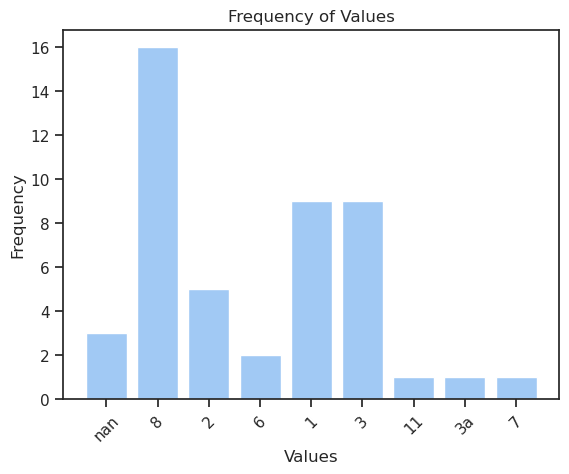

In [88]:
plt.bar(df1.iloc[0,17].keys(), df1.iloc[0,17].values())

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



In [89]:
df = df1[['strategyfreq_dict']]

In [90]:
def expand_dict_column(row):
    for key, value in row['strategyfreq_dict'].items():
        row[key] = int(value)
    return row

# Применяем функцию к каждой строке DataFrame
df = df.apply(expand_dict_column, axis=1)

# Удаляем столбец со словарями (если требуется)
#df.drop('dict_column', axis=1, inplace=True)

# Выводим DataFrame с новыми столбцами
df.head()

,1,11,1а,2,22,2а,3,33,3a,3а,3а’,4,4а,5,6,66,7,8,nan,strategyfreq_dict
ID,,,,,,,,,,,,,,,,,,,,
pr_A_1,9.0,1.0,NaN,5.0,NaN,NaN,9.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,16,3,"{'nan': 3, '8': 16, '2': 5, '6': 2, '1': 9, '3..."
pr_B_1,10.0,NaN,NaN,3.0,NaN,NaN,7.0,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,22,3,"{'nan': 3, '8': 22, '3': 7, '7': 2, '2': 3, '4..."
pr_E_1,5.0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,36,3,"{'nan': 3, '7': 2, '3': 7, '8': 36, '1': 5, '5..."
pr_G_1,14.0,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,33,3,"{'nan': 3, '8': 33, '7': 3, '3': 4, '1': 14, '..."
pr_I_1,3.0,NaN,1.0,1.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,34,3,"{'nan': 3, '8': 34, '1': 3, '3': 6, '7': 2, '1..."


In [91]:
df = df.fillna(0)
df.columns

Index(['1', '11', '1а', '2', '22', '2а', '3', '33', '3a', '3а', '3а’', '4',
       '4а', '5', '6', '66', '7', '8', 'nan', 'strategyfreq_dict'],
      dtype='object')

In [92]:
df['1'] = df['1'] + df['11'] + df['1а']
df['2'] = df['2'] + df['22'] + df['2а']
df['3'] = df['3'] + df['33'] + df['3a'] + df['3а'] + df['3а’']
df['4'] = df['4'] + df['4а']
df['6'] = df['6'] + df['66']

columns_to_drop = ['11', '1а', '22', '2а',  '33', '3a', '3а', '3а’', '4а', '66']
df = df.drop(columns=columns_to_drop)

In [93]:
df['fonetics'] = df['1'] 
df['derivation'] = df['2']
df['lexico-semantic field'] = df['3'] + df['4'] + df['5'] + df['6'] + df['7']
df['other'] = df['8']
columns_to_drop = ['1', '2', '3', '4',  '5', '6', '7', '8']
df = df.drop(columns=columns_to_drop)

In [94]:
#df = df.drop(['nan'])
df.columns
df = df.drop(['nan'], axis=1)
df.head()

,strategyfreq_dict,fonetics,derivation,lexico-semantic field,other
ID,,,,,
pr_A_1,"{'nan': 3, '8': 16, '2': 5, '6': 2, '1': 9, '3...",10.0,5.0,13.0,16
pr_B_1,"{'nan': 3, '8': 22, '3': 7, '7': 2, '2': 3, '4...",10.0,3.0,16.0,22
pr_E_1,"{'nan': 3, '7': 2, '3': 7, '8': 36, '1': 5, '5...",5.0,1.0,10.0,36
pr_G_1,"{'nan': 3, '8': 33, '7': 3, '3': 4, '1': 14, '...",14.0,1.0,7.0,33
pr_I_1,"{'nan': 3, '8': 34, '1': 3, '3': 6, '7': 2, '1...",4.0,1.0,9.0,34


Стратегии вытянуты

In [95]:
df = df.drop(['strategyfreq_dict'], axis = 1)


In [96]:
#df['strat_sum'] = df['1'] + df['2'] + df['3'] + df['4'] + df['5'] + df['6'] + df['7'] + df['8'] + df['9']
df['strat_sum'] = df['fonetics'] + df['derivation'] + df['lexico-semantic field'] + df['other']

In [97]:
dff = df.copy()
for col in dff.columns[:-1]:  # Исключаем последний столбец strat_sum
    dff[col] = dff[col] / df['strat_sum']

dff = dff.drop(['strat_sum'], axis = 1)
dff.head()

,fonetics,derivation,lexico-semantic field,other
ID,,,,
pr_A_1,0.227273,0.113636,0.295455,0.363636
pr_B_1,0.196078,0.058824,0.313725,0.431373
pr_E_1,0.096154,0.019231,0.192308,0.692308
pr_G_1,0.254545,0.018182,0.127273,0.600000
pr_I_1,0.083333,0.020833,0.187500,0.708333


In [98]:
dfabsfreq = df.copy()

In [99]:
dff.iloc[0,0]

0.22727272727272727

dff - композиционный данные, представлены в виде частот. 

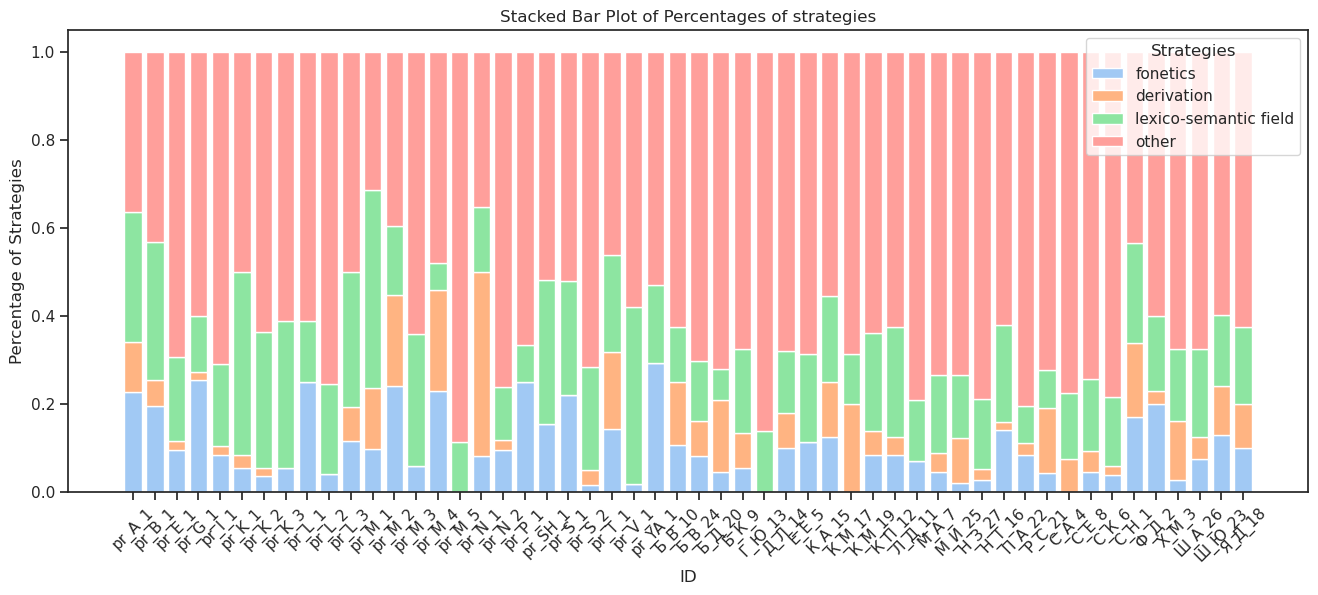

In [100]:
# Plotting the stacked bar plot
plt.figure(figsize=(16, 6))
#plt.bar(dff.index, df['1'], label='1')
#bottom = dff['1']
bottom = 0
for col in dff.columns[0:]:
    plt.bar(dff.index, dff[col], bottom=bottom, label=col)
    bottom += dff[col]
plt.xlabel('ID')
plt.ylabel('Percentage of Strategies')
plt.title('Stacked Bar Plot of Percentages of strategies')
plt.legend(title='Strategies')
plt.xticks(rotation=45)
plt.show()

In [101]:
dff['type'] = df1['type']
centerians_freqs = dff[dff['type']=='senior academics']
students_freqs = dff[dff['type']=='students']


In [102]:
centerians_freqs.shape[1]

5

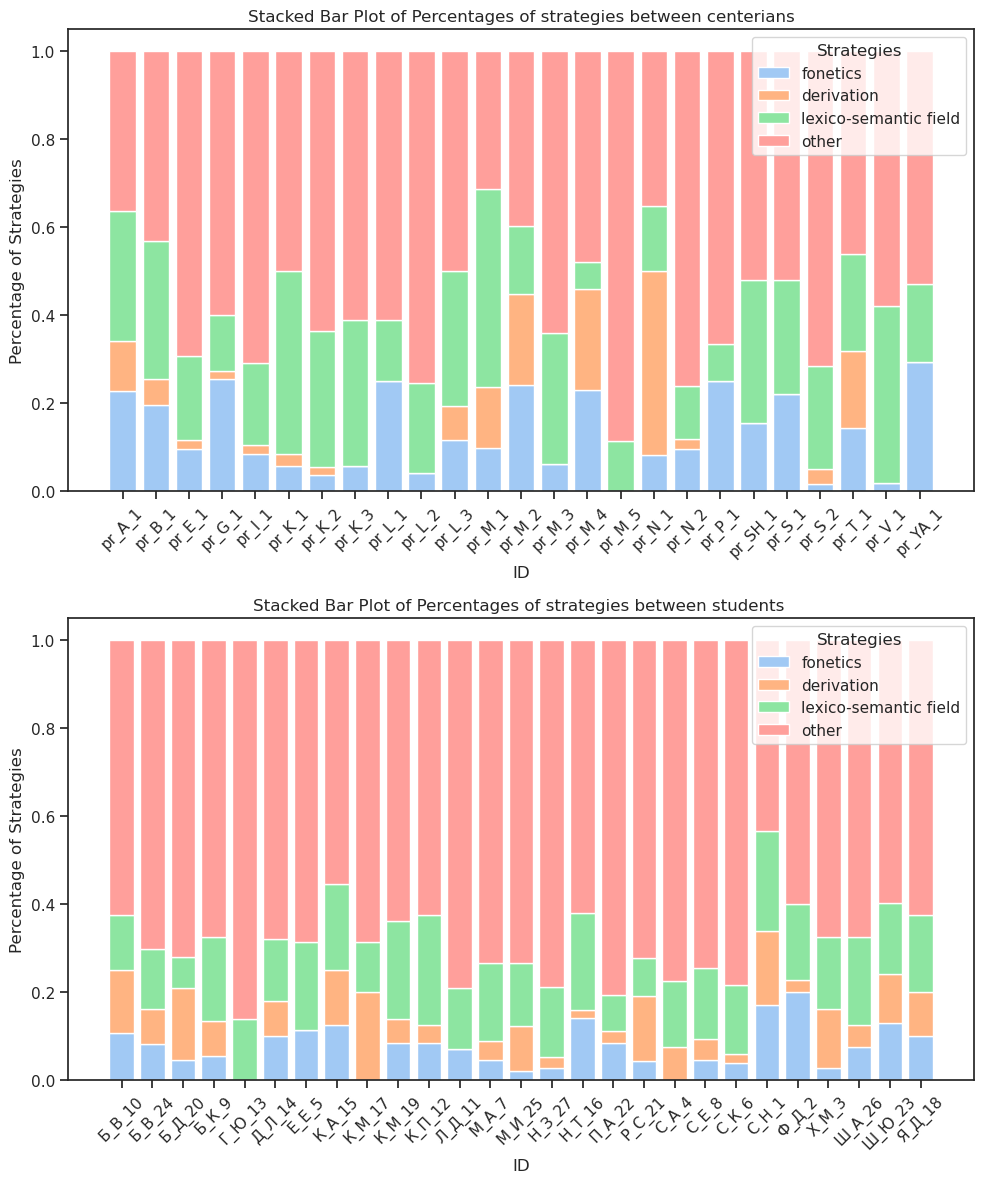

In [103]:
# Plotting the stacked bar plot
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

bottom = 0
for col in centerians_freqs.columns[0:centerians_freqs.shape[1]-1]:
    ax[0].bar(centerians_freqs.index, centerians_freqs[col], bottom=bottom, label=col)
    bottom += centerians_freqs[col]
ax[0].set_xlabel('ID')
ax[0].set_ylabel('Percentage of Strategies')
ax[0].set_title('Stacked Bar Plot of Percentages of strategies between centerians')
ax[0].legend(title='Strategies')
ax[0].tick_params(axis='x', rotation=45)

bottom = 0
for col in students_freqs.columns[0:students_freqs.shape[1]-1]:
    ax[1].bar(students_freqs.index, students_freqs[col], bottom=bottom, label=col)
    bottom += students_freqs[col]
ax[1].set_xlabel('ID')
ax[1].set_ylabel('Percentage of Strategies')
ax[1].set_title('Stacked Bar Plot of Percentages of strategies between students ')
ax[1].legend(title='Strategies')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Можно поставить гипотезу, что студенты чаще пользуются стратегией 2, проф пользуются 9, проф чаще стратегией 1. Есть еще вариант сделать логнормальную трансформацию, и сравнивать уже распределения

In [104]:
dff.drop(['type'], axis =1)

,fonetics,derivation,lexico-semantic field,other
ID,,,,
pr_A_1,0.227273,0.113636,0.295455,0.363636
pr_B_1,0.196078,0.058824,0.313725,0.431373
pr_E_1,0.096154,0.019231,0.192308,0.692308
pr_G_1,0.254545,0.018182,0.127273,0.600000
pr_I_1,0.083333,0.020833,0.187500,0.708333
pr_K_1,0.055556,0.027778,0.416667,0.500000
pr_K_2,0.036364,0.018182,0.309091,0.636364
pr_K_3,0.055556,0.000000,0.333333,0.611111
pr_L_1,0.250000,0.000000,0.138889,0.611111


In [105]:
#df_log_transformed = np.log(dff.drop(['type'], axis =1))
# Применяем логарифмическую трансформацию с добавлением небольшой константы ко всем значениям в DataFrame
#df_log_transformed = np.log(df + 1e-10)  # Добавляем маленькую константу 1e-10 перед применением логарифма


# Применяем логарифмическую трансформацию с добавлением единицы ко всем значениям в DataFrame
df_log_transformed = np.log(dff.drop(['type'] , axis =1) * 60 + 1e-10)


In [106]:
df_log_transformedfromabs = np.log(dfabsfreq.drop(['strat_sum'], axis =1) + 1e-10)

In [107]:
df_percent = dff.drop(['type'], axis =1) * 100
df_percent.head()

,fonetics,derivation,lexico-semantic field,other
ID,,,,
pr_A_1,22.727273,11.363636,29.545455,36.363636
pr_B_1,19.607843,5.882353,31.372549,43.137255
pr_E_1,9.615385,1.923077,19.230769,69.230769
pr_G_1,25.454545,1.818182,12.727273,60.000000
pr_I_1,8.333333,2.083333,18.750000,70.833333


In [108]:
y = dff[['type']]
X = df_percent.copy()

In [109]:
data_whole = X.copy()
data_whole['type'] = y
data_whole.head()
data_whole.to_csv('strategies_freqs', sep = '\t')

In [110]:
data_whole.columns

Index(['fonetics', 'derivation', 'lexico-semantic field', 'other', 'type'], dtype='object')

In [111]:
df_melted = data_whole.melt(
    id_vars=['type'],
    value_vars=['fonetics', 'derivation', 'lexico-semantic field', 'other'],
    var_name='strategy', value_name='frequency percents'
)
#create seaborn boxplots by group
#sns.boxplot(x='variable', y='value', data=df_melted)
df_melted

,type,strategy,frequency percents
0,senior academics,fonetics,22.727273
1,senior academics,fonetics,19.607843
2,senior academics,fonetics,9.615385
3,senior academics,fonetics,25.454545
4,senior academics,fonetics,8.333333
...,...,...,...
203,students,other,60.000000
204,students,other,67.567568
205,students,other,67.500000
206,students,other,59.677419


Text(0, 0.5, 'frequencies')

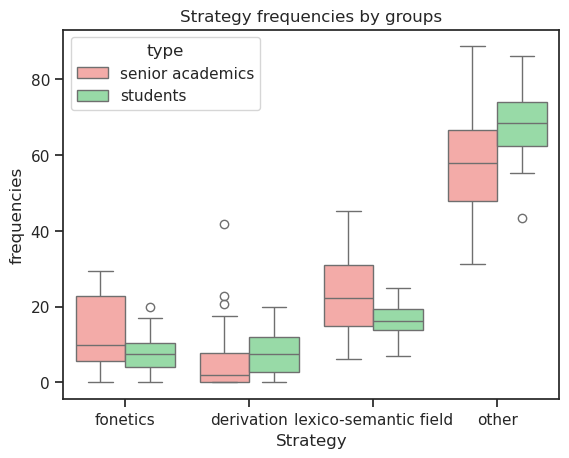

In [112]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(df_melted, x='strategy', y = 'frequency percents', hue = 'type', palette={'senior academics':'r', 'students':'g'}).set(title='Strategy frequencies by groups')

#modify axis labels
plt.xlabel('Strategy')
plt.ylabel('frequencies')

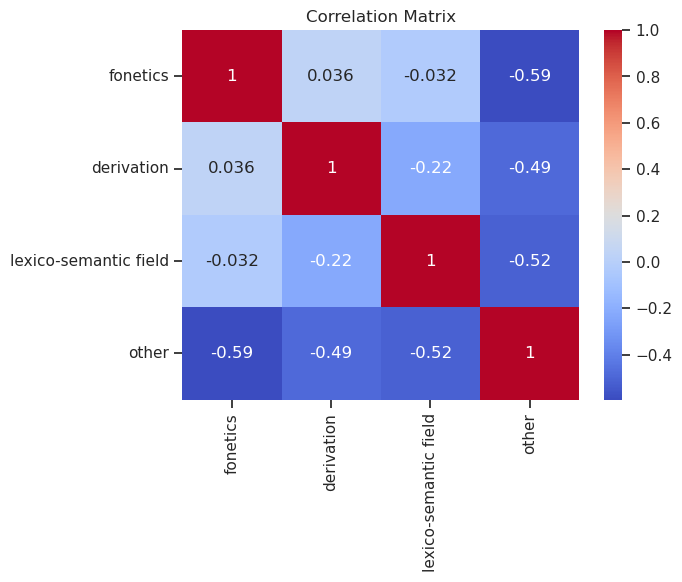

In [113]:
# возможная связь стратегий
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## ```Clustering```

In [114]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, v_measure_score, completeness_score

In [139]:
def plot_tsne(data, n_iter=1000, 
              perplexity=40, color=None):
    """
    Функция для отрисовки результатов работы t-SNE
        :param data: таблица объекты х признаки
        :param n_iter: число итераций градиентного спуска,
            может быть полезно увеличить, чтобы получить результаты получше
        :param perplexity: 
        :param color: np.array[n_samples] с переменной,
            которой мы хотим покрасить наши наблюдения
        :return tsne_emb: np.array[n_samples, 2] - результаты работы t-SNE
    """
    
    # Сначала сделаем PCA, так как это хорошее начальное приближение для t-SNE
    # позволит алгоритму быстрее сойтись
    pca = PCA().fit(data)
    pca_embedding = pca.transform(data)
    
    # Запустим t-SNE, он выдаст нам для каждого объекта по 2 числа, 
    # которые мы сможем нарисовать
    tnse = TSNE(n_components=2, init=pca_embedding[:, :2], n_jobs=-1,
                n_iter=n_iter, perplexity=perplexity)
    tsne_embedding = tnse.fit_transform(pca_embedding)
    sns.set_theme(style="ticks", palette="pastel")
    sns.scatterplot(x=tsne_embedding[:, 0],
                    y=tsne_embedding[:, 1],
                    hue=color, palette={0:'g', 1:'r'})
    
    plt.legend(title='Group', loc='upper right', labels=[ 'senior academics', 'students'])
    plt.xlabel("$TSNE_1$", fontsize=18)
    plt.ylabel("$TSNE_2$", fontsize=18)
    plt.title("PCA + t-SNE",fontsize=20 )
    
    # Вернем также результаты t-SNE, так как, если потом захотим перестроить картинку,
    # в таком случае нам не придется ждать заново, просто нарисуем новую с готовыми данными
    
    return tsne_embedding

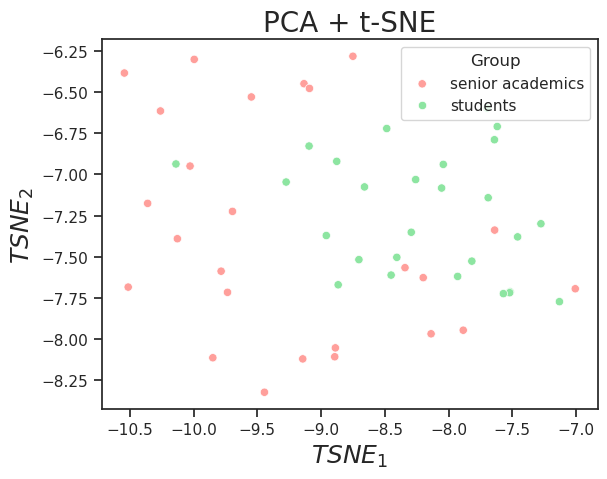

In [140]:
labels_cent_true = list(y['type']=='senior academics')
labels_cent_true = np.int32(labels_cent_true)
#labels_cent_true
tsne_res = plot_tsne(X, color = labels_cent_true)
#labels_cent_true

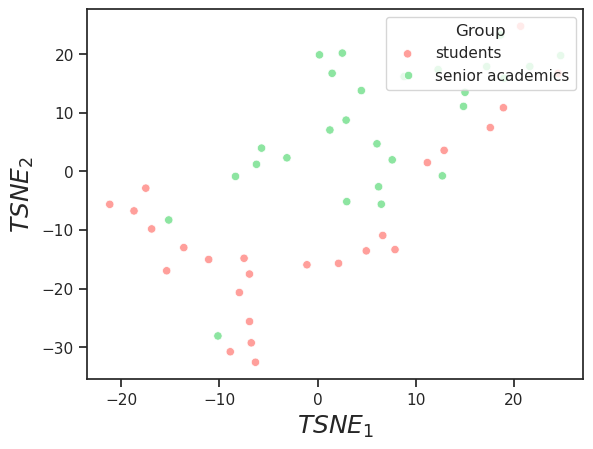

In [117]:
labels_cent_true = list(y['type']=='senior academics')
labels_cent_true = np.int32(labels_cent_true)
#labels_cent_true
tsne_res = plot_tsne(X, color = labels_cent_true,  perplexity=8
                     )
#labels_cent_true

In [118]:
def algorithm_selection(X, k, distances, linkages):
    """
    Для заданных алгоримов кластеризации и гиперпараметров 
    считает различные метрики кластеризации
        :param X: наши данные (n_samples, n_features)
        :param distances: список возможных метрик расстояния
        :param linkages: параметр linkage ('average', 'single', 'complete')
        :param metrics: список возможных метрик качества кластеризации
    :return compare_dataframe: таблица с метриками кластеризации
    """
    compare_dataframe = pd.DataFrame(columns=['Algorithm', 'Distance', 'Linkage', 'number_of_clusters', 'Silhouette'])

    # K-средних
    for linkage in linkages:
        

        for distance in distances:
            for n_of_clusters in k:
                kmeans = KMeans(n_clusters=n_of_clusters, random_state=42)
                cluster_labels = kmeans.fit_predict(X)
                silhouette = silhouette_score(X, cluster_labels)

                res_tmp = pd.DataFrame({'Algorithm': ['KMeans'],
                                        'Distance': [distance],
                                        'Linkage': [linkage],
                                        'number_of_clusters' : [n_of_clusters],
                                        'Silhouette': [silhouette]})
                compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)

    # Агломеративная кластеризация
    for linkage in linkages:
        # Run clustering model with current parameter set and add results to DataFrame
        if linkage == 'ward':
            for n_of_clusters in k:    
                hier_model = AgglomerativeClustering(n_clusters=n_of_clusters, metric='euclidean', linkage=linkage)
                cluster_labels = hier_model.fit_predict(X)

                silhouette = silhouette_score(X, cluster_labels)

                res_tmp = pd.DataFrame({'Algorithm': ['Agglomerative'],
                                        'Distance': ['euclidean'],
                                        'Linkage': 'ward',
                                        'number_of_clusters' : [n_of_clusters],
                                        'Silhouette': [silhouette]})
                compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)    
        else: 
            for distance in distances:
                for n_of_clusters in k:
                    hier_model = AgglomerativeClustering(n_clusters=n_of_clusters, metric=distance, linkage=linkage)
                    cluster_labels = hier_model.fit_predict(X)

                    silhouette = silhouette_score(X, cluster_labels)

                    res_tmp = pd.DataFrame({'Algorithm': ['Agglomerative'],
                                            'Distance': [distance],
                                            'Linkage': [linkage],
                                            'number_of_clusters' : [n_of_clusters],
                                            'Silhouette': [silhouette]})
                    compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)            
                
    return compare_dataframe

In [119]:
distances = ['chebyshev', 'manhattan', 'euclidean', 'cosine']
algorithms = ['average', 'single', 'complete', 'ward']
metrics = [silhouette_score]
number_of_clusters = np.arange(2,7)
result_df = algorithm_selection(X, distances=distances, linkages=algorithms, k=number_of_clusters)

/tmp/ipykernel_713/1258080711.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)


In [120]:
result_df.sort_values(by = 'Silhouette', ascending=False)

,Algorithm,Distance,Linkage,number_of_clusters,Silhouette
115,Agglomerative,cosine,single,2,0.476658
100,Agglomerative,chebyshev,single,2,0.476658
105,Agglomerative,manhattan,single,2,0.476658
110,Agglomerative,euclidean,single,2,0.476658
80,Agglomerative,chebyshev,average,2,0.466295
...,...,...,...,...,...
119,Agglomerative,cosine,single,6,0.250649
114,Agglomerative,euclidean,single,6,0.250649
128,Agglomerative,manhattan,complete,5,0.249012
109,Agglomerative,manhattan,single,6,0.228732


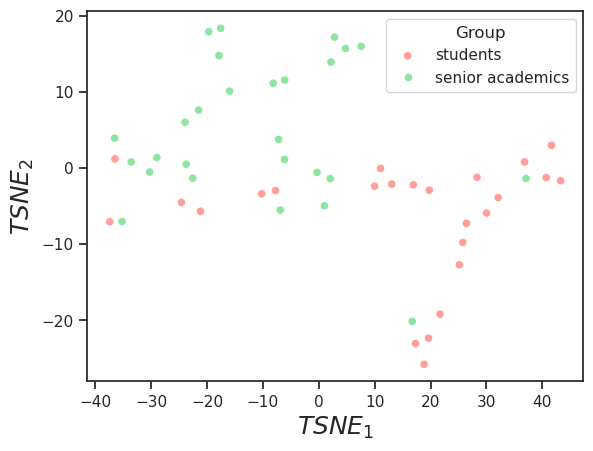

In [121]:
model = AgglomerativeClustering(n_clusters=2, linkage='single', metric='manhattan')
cluster_labels = model.fit_predict(X)
tsne_res = plot_tsne(X, color=labels_cent_true)

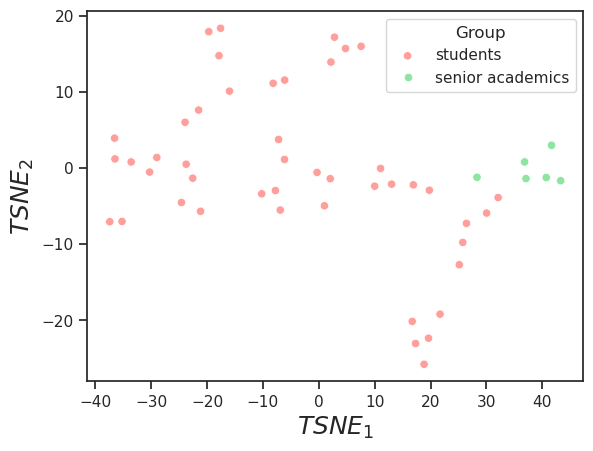

In [122]:
 #metric='euclidean', linkage='ward'

model = AgglomerativeClustering(n_clusters=2, linkage='average', metric='manhattan')
cluster_labels = model.fit_predict(X)
tsne_res = plot_tsne(X, color=cluster_labels)

In [123]:
def algorithm_selection(X, y_true, k, distances, linkages, metrics=None):
    """
    Для заданных алгоримов кластеризации и гиперпараметров 
    считает различные метрики кластеризации
        :param X: наши данные (n_samples, n_features)
        :param distances: список возможных метрик расстояния
        :param linkages: параметр linkage ('average', 'single', 'complete')
        :param metrics: список возможных метрик качества кластеризации
    :return compare_dataframe: таблица с метриками кластеризации
    """
    compare_dataframe = pd.DataFrame(columns=['Algorithm', 'Distance', 'Linkage', 'Homogeneity', 'Completeness', 'V-measure', 'Silhouette'])

    # K-средних
    for linkage in linkages:
        for distance in distances:
            kmeans = KMeans(n_clusters=k, random_state=42)
            cluster_labels = kmeans.fit_predict(X)
    
            homogeneity = homogeneity_score(y_true, cluster_labels)
            completeness = completeness_score(y_true, cluster_labels)
            v_measure = v_measure_score(y_true, cluster_labels)
            silhouette = silhouette_score(X, cluster_labels)

            res_tmp = pd.DataFrame({'Algorithm': ['KMeans'],
                                    'Distance': [distance],
                                    'Linkage': [linkage],
                                    'Homogeneity': [homogeneity],
                                    'Completeness': [completeness],
                                    'V-measure': [v_measure],
                                    'Silhouette': [silhouette]})
            compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)
    # Агломеративная кластеризация
    for linkage in linkages:
        for distance in distances:
            hier_model = AgglomerativeClustering(n_clusters=k, metric=distance, linkage=linkage)
            cluster_labels = hier_model.fit_predict(X)

            homogeneity = homogeneity_score(y_true, cluster_labels)
            completeness = completeness_score(y_true, cluster_labels)
            v_measure = v_measure_score(y_true, cluster_labels)
            silhouette = silhouette_score(X, cluster_labels)

            res_tmp = pd.DataFrame({'Algorithm': ['Agglomerative'],
                                    'Distance': [distance],
                                    'Linkage': [linkage],
                                    'Homogeneity': [homogeneity],
                                    'Completeness': [completeness],
                                    'V-measure': [v_measure],
                                    'Silhouette': [silhouette]})
            compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)            
    # DBSCAN
    for distance in distances:
        dbscan = DBSCAN(eps=0.5, metric=distance)
        cluster_labels = dbscan.fit_predict(X)

        homogeneity = homogeneity_score(y_true, cluster_labels)
        completeness = completeness_score(y_true, cluster_labels)
        v_measure = v_measure_score(y_true, cluster_labels)
        #silhouette = silhouette_score(X, cluster_labels)

        res_tmp = pd.DataFrame({'Algorithm': ['DBSCAN'],
                                'Distance': [distance],
                                'Linkage': ['N/A'],
                                'Homogeneity': [homogeneity],
                                'Completeness': [completeness],
                                'V-measure': [v_measure],
                                'Silhouette': ['nan']})
        compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)
                
    return compare_dataframe

In [124]:
distances = ['chebyshev', 'manhattan', 'euclidean', 'cosine']
algorithms = ['average', 'single', 'complete']
metrics = [silhouette_score]
number_of_clusters = np.arange(2,7)
result_df = algorithm_selection(X,y_true=labels_cent_true, distances=distances, linkages=algorithms, k=2)

/tmp/ipykernel_713/2742296595.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compare_dataframe = pd.concat([compare_dataframe, res_tmp], ignore_index=True)


In [125]:
result_df.sort_values(by=['V-measure', 'Silhouette'], ascending=False)

,Algorithm,Distance,Linkage,Homogeneity,Completeness,V-measure,Silhouette
21,Agglomerative,manhattan,complete,0.305350,0.342535,0.322876,0.37757
22,Agglomerative,euclidean,complete,0.272589,0.314169,0.291906,0.368907
23,Agglomerative,cosine,complete,0.272589,0.314169,0.291906,0.368907
20,Agglomerative,chebyshev,complete,0.166205,0.175308,0.170635,0.325338
0,KMeans,chebyshev,average,0.161176,0.165445,0.163283,0.366446
1,KMeans,manhattan,average,0.161176,0.165445,0.163283,0.366446
2,KMeans,euclidean,average,0.161176,0.165445,0.163283,0.366446
3,KMeans,cosine,average,0.161176,0.165445,0.163283,0.366446
4,KMeans,chebyshev,single,0.161176,0.165445,0.163283,0.366446
5,KMeans,manhattan,single,0.161176,0.165445,0.163283,0.366446


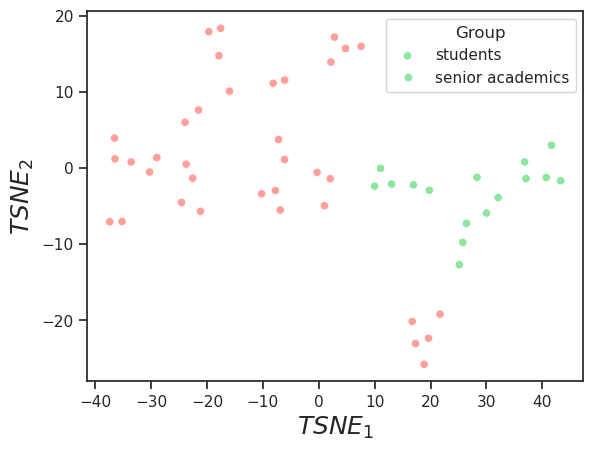

In [126]:
model = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='manhattan')
cluster_labels = model.fit_predict(X)
tsne_res = plot_tsne(X, color=cluster_labels)

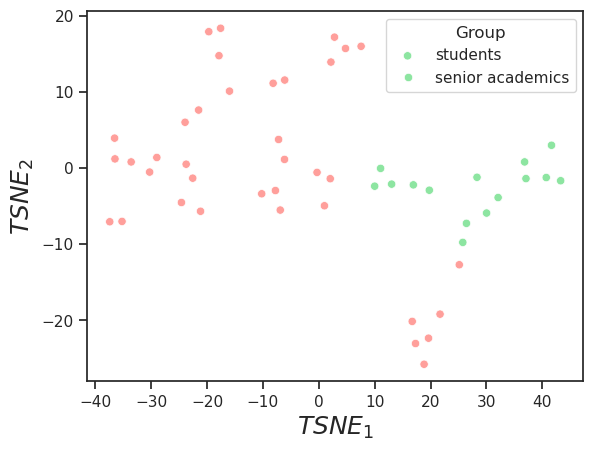

In [127]:
model = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')
cluster_labels = model.fit_predict(X)
tsne_res = plot_tsne(X, color=cluster_labels)

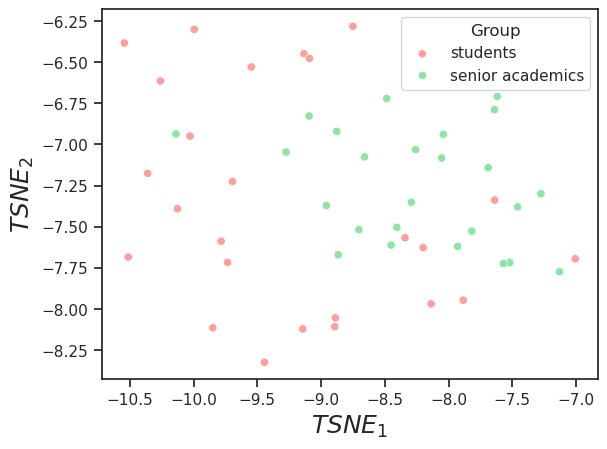

In [128]:
labels_cent_true = list(y['type']=='senior academics')
labels_cent_true = np.int32(labels_cent_true)
#labels_cent_true
tsne_res = plot_tsne(X, color = labels_cent_true, perplexity=40)

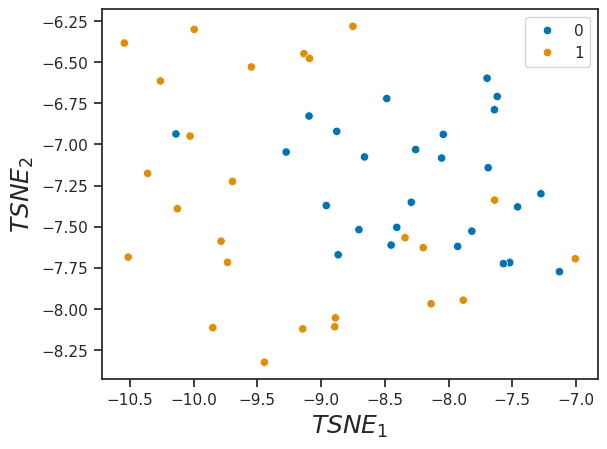

In [61]:
tsne_res = plot_tsne(X, color=labels_cent_true)

In [111]:
#Случайный лес
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#X, y = labeled_fc_data[labeled_fc_data.columns[labeled_fc_data.columns != 'Population']], labeled_fc_data['Population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=4, n_estimators=4, random_state=111)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Оценка качества модели с использованием F1-score
f1 = f1_score(y_test, y_test_predict, average='macro')
print("F1-score (macro):", f1)
print(f'Train f1: \n{classification_report(y_train, y_train_predict)}')
print(f'Test f1: \n{classification_report(y_test, y_test_predict)}')

F1-score (macro): 0.6071428571428572
Train f1: 
              precision    recall  f1-score   support

centenarians       0.89      0.89      0.89        19
    students       0.91      0.91      0.91        22

    accuracy                           0.90        41
   macro avg       0.90      0.90      0.90        41
weighted avg       0.90      0.90      0.90        41

Test f1: 
              precision    recall  f1-score   support

centenarians       0.62      0.83      0.71         6
    students       0.67      0.40      0.50         5

    accuracy                           0.64        11
   macro avg       0.65      0.62      0.61        11
weighted avg       0.64      0.64      0.62        11



/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Попытка в визуальный анализ - виолинплот например

Text(0, 0.5, 'frequencies')

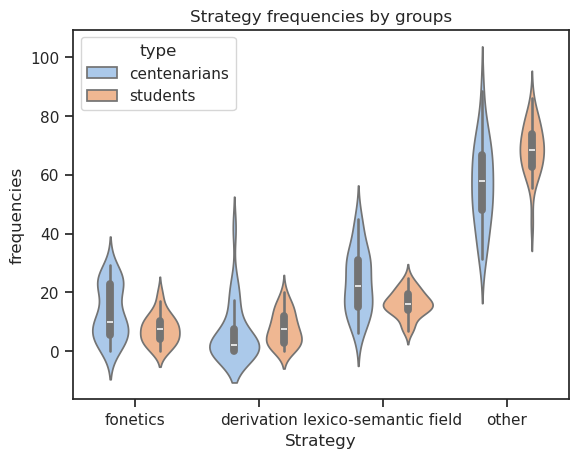

In [63]:
sns.violinplot(df_melted, x='strategy', y = 'frequency percents', hue = 'type').set(title='Strategy frequencies by groups')

#modify axis labels
plt.xlabel('Strategy')
plt.ylabel('frequencies') 

In [64]:
X.to_csv('X.tsv', sep = '\t', index = False)
y.to_csv('y.tsv', sep = '\t', index = False)

1) нарисовать боксплоты отдельно по группам, сравнить, сравнить статзначимость
2) построить решающее дерево, либо ансамбли дерево, (переобучение). , байесовский классификатор, логистическая грегрессия, кросс-валидация



## Иная идея. Гипотеза - фонетические стратегии самые быстрые и 8 (1,9, частично 2). - стоит проверить
1. как стратегии ложатся на время. внутри повторения одной стратегии. цепь стратегий и пауза между ними. брать среднюю паузу внутри стратегии одной (если происходит цепь из одной стратегии, например 1 1 1 1 1 - 4 паузы для 1 стратегии, или 3 3 3 3 - 3 паузы для стратегии 8). средняя пауза для каждой стратегии для каждого наблюдения. (удалять паузу стратегии из подсчета, если она встречается один раз в цепи) . - то есть средняя стратегия в цепи стратегий. 



## частотность слов. - проранжировать частоты, распредления сравнить по частотам рангом

1. то как частотность влияет на стратегии. какие частотности используются стратегии. состав по уровню частотности слов внутри каждой стратегии. уровень частотности (стол, стул). по стобцам - ранги частотностей слов. по строкам - стратегии. в пересечении число таких пересечений. 

2. частотность слова - пауза перед этим словом.  и это уже попробовать соотнести со стратегией. 

3. паузация и стратегия. 

укрупнить стратегии - фонетическая и лексическая. 1 - фонетика, лексика : 

In [49]:
data_whole.head()

,fonetics,derivation,lexico-semantic field,other,type
ID,,,,,
pr_A_1,22.727273,11.363636,29.545455,36.363636,senior academics
pr_B_1,19.607843,5.882353,31.372549,43.137255,senior academics
pr_E_1,9.615385,1.923077,19.230769,69.230769,senior academics
pr_G_1,25.454545,1.818182,12.727273,60.000000,senior academics
pr_I_1,8.333333,2.083333,18.750000,70.833333,senior academics


In [50]:
from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(*data_whole.groupby('type')['fonetics'].apply(list))
U1, p1

(455.5, 0.0313083550285643)

In [51]:
U2, p2 = mannwhitneyu(*data_whole.groupby('type')['derivation'].apply(list))
U2, p2

(224.5, 0.0378255488664108)

In [52]:
U3, p3 = mannwhitneyu(*data_whole.groupby('type')['lexico-semantic field'].apply(list))
U3, p3

(468.5, 0.016835628820404142)

In [53]:
U4, p4 = mannwhitneyu(*data_whole.groupby('type')['other'].apply(list))
U4, p4

(162.5, 0.0013908820374865175)

Text(-0.3, 90, 'pval = 0.031')

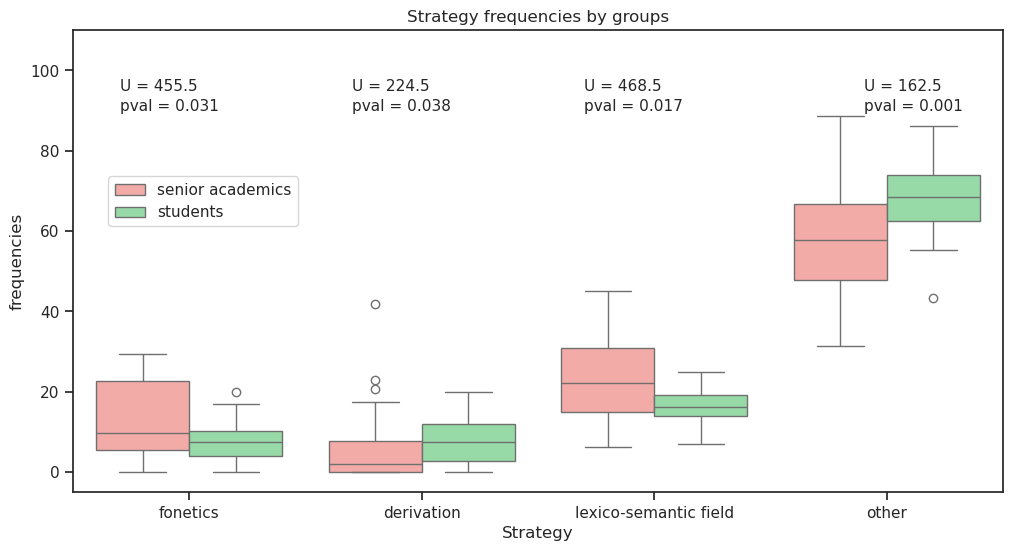

In [80]:
plt.figure(figsize=(12, 6))


sns.set_theme(style="ticks", palette="pastel")
g = sns.boxplot(df_melted, x='strategy', y = 'frequency percents', hue = 'type', palette={'senior academics':'r', 'students':'g'})
g.set(title='Strategy frequencies by groups')
g.legend( bbox_to_anchor=(0.25, 0.7))
#modify axis labels
plt.xlabel('Strategy')
plt.ylabel('frequencies')
plt.ylim((-5,110))

plt.text(2.9, 95, f"U = {U4:.1f}", rotation = 0, fontsize = 11)         # Size
      # Style)

plt.text(1.7, 95, f"U = {U3:.1f}", rotation = 0, fontsize = 11)         # Size
      # Style)

plt.text(0.7, 95, f"U = {U2:.1f}", rotation = 0, fontsize = 11)         # Size
      # Style)

plt.text(-0.3, 95, f"U = {U1:.1f}", rotation = 0, fontsize = 11)         # Size
      # Style)


plt.text(2.9, 90, f"pval = {p4:.3f}", rotation = 0, fontsize = 11)         # Size
      # Style)

plt.text(1.7, 90, f"pval = {p3:.3f}", rotation = 0, fontsize = 11)         # Size
      # Style)

plt.text(0.7, 90, f"pval = {p2:.3f}", rotation = 0, fontsize = 11)         # Size
      # Style)

plt.text(-0.3, 90, f"pval = {p1:.3f}", rotation = 0, fontsize = 11)         # Size
      # Style)

In [106]:
y

,type
0,centenarians
1,centenarians
2,centenarians
3,centenarians
4,centenarians
5,centenarians
6,centenarians
7,centenarians
8,centenarians
9,centenarians


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import math
import pandas as pd
import xgboost
import lightgbm
import catboost

from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr
from itertools import combinations
from sklearn.base import BaseEstimator
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier,
                              ExtraTreesClassifier,
                              VotingClassifier)
from sklearn.tree import (DecisionTreeRegressor,
                          DecisionTreeClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, f1_score, accuracy_score, roc_auc_score


from scipy.special import comb

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [73]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#ffdab9","#9898ff", "#4B0082"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(["#ffdab9", "#4c4c7f", "#4B0082"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [142]:
y = dff[['type']]
X = df_percent.copy()

y = y.reset_index(drop=True)
X = X.reset_index(drop=True)
y['type'] = np.where(y['type'] == 'senior academics', True, False)

In [135]:
#Случайный лес
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#X, y = labeled_fc_data[labeled_fc_data.columns[labeled_fc_data.columns != 'Population']], labeled_fc_data['Population']

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(max_depth=5, n_estimators=4, random_state=111)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Оценка качества модели с использованием F1-score
f1 = f1_score(y_test, y_test_predict, average='macro')
print("F1-score (macro):", f1)
print(f'Train f1: \n{classification_report(y_train, y_train_predict)}')
print(f'Test f1: \n{classification_report(y_test, y_test_predict)}')

F1-score (macro): 0.6190476190476191
Train f1: 
              precision    recall  f1-score   support

       False       0.80      1.00      0.89        20
        True       1.00      0.69      0.81        16

    accuracy                           0.86        36
   macro avg       0.90      0.84      0.85        36
weighted avg       0.89      0.86      0.86        36

Test f1: 
              precision    recall  f1-score   support

       False       0.55      0.86      0.67         7
        True       0.80      0.44      0.57         9

    accuracy                           0.62        16
   macro avg       0.67      0.65      0.62        16
weighted avg       0.69      0.62      0.61        16



/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [230]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numcols = X.columns
preprocessor = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), numcols)
    #("ohe", OneHotEncoder(drop="first"), catcols)
])


params_gbdt = {
    'boosting_type': 'gbdt',
    'num_leaves': 35,
    'max_depth': 6,  # 
    'learning_rate': 0.2,
    'n_estimators': 300,
    'reg_alpha': 0,
    'reg_lambda': 0,
    'random_state': SEED,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.85,
    'bagging_freq': 2
}
knn_pipeline_boost = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", lightgbm.LGBMClassifier(**params_gbdt))
])
loglin_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", LogisticRegression(random_state=42))
])


#knn_pipeline_boost.fit(X_train, y_train)
loglin_pipeline.fit(X_train, y_train)

#y_pred_boost = knn_pipeline_boost.predict(X_test)
y_pred_log = loglin_pipeline.predict(X_test)

/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:

print('accuracy_score for lightgbm gbdt:', accuracy_score(y_test, y_pred_boost))
print('f1_score for lightgbm gbdt:', f1_score(y_test, y_pred_boost))

accuracy_score for lightgbm gbdt: 0.6363636363636364
f1_score for lightgbm gbdt: 0.7142857142857143


In [231]:
print('accuracy_score for logregr', accuracy_score(y_test, y_pred_log))
print('f1_score for logregr:', f1_score(y_test, y_pred_log))

accuracy_score for logregr 0.7272727272727273
f1_score for logregr: 0.7692307692307693


In [228]:
y = dff[['type']]
X = df_percent.copy()

y = y.reset_index(drop=True)
X = X.reset_index(drop=True)
y['type'] = np.where(y['type'] == 'senior academics', True, False)

In [229]:
X.head()

,fonetics,derivation,lexico-semantic field,other
0,22.727273,11.363636,29.545455,36.363636
1,19.607843,5.882353,31.372549,43.137255
2,9.615385,1.923077,19.230769,69.230769
3,25.454545,1.818182,12.727273,60.000000
4,8.333333,2.083333,18.750000,70.833333


In [201]:
myX = X.copy()

In [187]:
pair0 = [0,2]

In [196]:
pair0[1]

2

In [178]:
idx = np.where(y == False)
idxlist = list(idx[0])

In [179]:
idx = np.where(y == True)
idx[0]
X.columns[pair0[0]]
X.iloc[idxlist, 0]

25    10.714286
26     8.108108
27     4.651163
28     5.405405
29     0.000000
30    10.000000
31    11.428571
32    12.500000
33     0.000000
34     8.333333
35     8.333333
36     6.976744
37     4.444444
38     2.040816
39     2.631579
40    14.000000
41     8.333333
42     4.255319
43     0.000000
44     4.651163
45     3.921569
46    16.981132
47    20.000000
48     2.702703
49     7.500000
50    12.903226
51    10.000000
Name: fonetics, dtype: float64

[0, 1]
[0, 2]
[0, 3]
[1, 2]


/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/tmp/ipykernel_9461/143403869.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/tmp/ipykernel_9461/143403869.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vecto

[1, 3]
[2, 3]


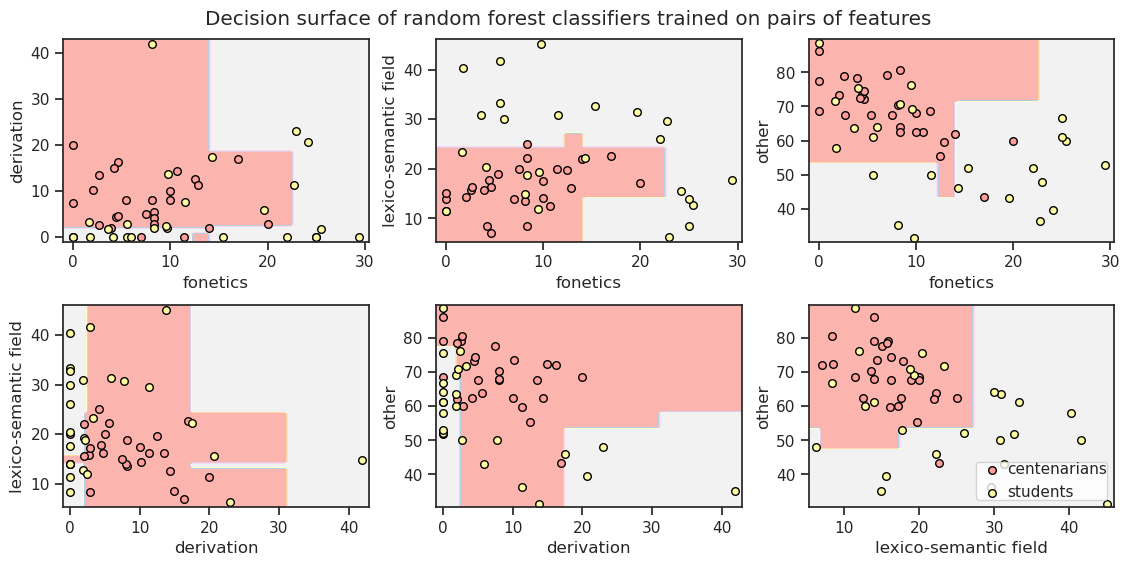

In [241]:
plt.figure(figsize=(12, 6))

# Parameters
n_classes = 2
plot_colors = "ry"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    print(pair)
    # We only take the two corresponding features
    X = myX.iloc[:, pair]

    #Xsc = StandardScaler().fit_transform(X)

    # Train
    clf = RandomForestClassifier(max_depth=2, n_estimators=3, random_state=111).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.Pastel1,
        response_method="predict",
        ax=ax,
        xlabel=X.columns[0],
        ylabel=X.columns[1],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        idxlist = list(idx[0])
        plt.scatter(
            X.iloc[idxlist, 0],
            X.iloc[idxlist, 1],
            c=color,
            label=i,
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=30,
        )

plt.suptitle("Decision surface of random forest classifiers trained on pairs of features")
plt.legend(['senior academics', 'students'], loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

[0, 1]
[0, 2]
[0, 3]
[1, 2]


/tmp/ipykernel_9461/3584897829.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_9461/3584897829.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_9461/3584897829.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_9461/3584897829.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_9461/3584897829.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipykernel_9461/3584897829.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


[1, 3]
[2, 3]


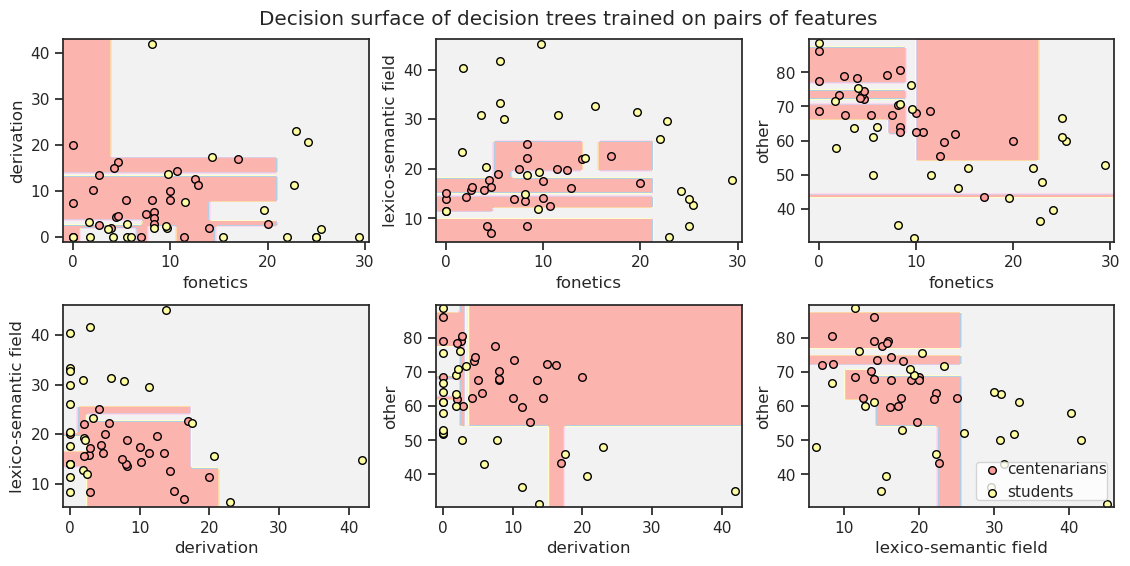

In [221]:
plt.figure(figsize=(12, 6))

# Parameters
n_classes = 2
plot_colors = "ry"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    print(pair)
    # We only take the two corresponding features
    X = myX.iloc[:, pair]

    #Xsc = StandardScaler().fit_transform(X)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.Pastel1,
        response_method="predict",
        ax=ax,
        xlabel=X.columns[0],
        ylabel=X.columns[1],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        idxlist = list(idx[0])
        plt.scatter(
            X.iloc[idxlist, 0],
            X.iloc[idxlist, 1],
            c=color,
            label=i,
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=30,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(['senior academics', 'students'], loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

[0, 1]
[0, 2]
[0, 3]


/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_9461/2149479379.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[idxlist, 0], X.iloc[idxlist, 1],
/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_9461/2149479379.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[idxlist, 0], X.iloc[idxlist, 1],
/home/aryuna/micromamba/envs/sharapkova/lib/python3.

[1, 2]
[1, 3]


/tmp/ipykernel_9461/2149479379.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[idxlist, 0], X.iloc[idxlist, 1],
/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_9461/2149479379.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.iloc[idxlist, 0], X.iloc[idxlist, 1],


[2, 3]


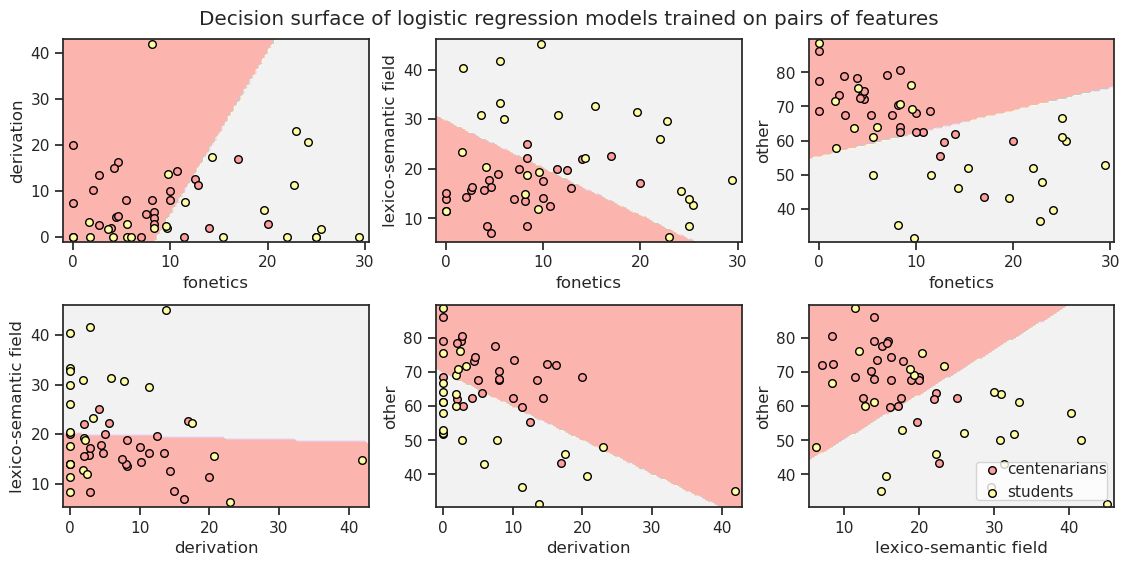

In [227]:
plt.figure(figsize=(12, 6))

# Parameters
n_classes = 2
plot_colors = "ry"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    print(pair)
    # We only take the two corresponding features
    X = myX.iloc[:, pair]

    #Xsc = StandardScaler().fit_transform(X)

    # Train
    clf = LogisticRegression().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.Pastel1,
        response_method="predict",
        ax=ax,
        xlabel=X.columns[0],
        ylabel=X.columns[1],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        idxlist = list(idx[0])
        plt.scatter(X.iloc[idxlist, 0], X.iloc[idxlist, 1],
            #Xsc[idxlist, 0],
            #Xsc[idxlist, 1],
            c=color,
            label=i,
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=30,
        )

plt.suptitle("Decision surface of logistic regression models trained on pairs of features")
plt.legend(['senior academics', 'students'], loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

In [ ]:
clf = LogisticRegression().fit(myX, y)


In [ ]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
iris = load_iris()
X = iris.data[:, :2]
classifier = LogisticRegression().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

Добавить длину паузы и частотность, посмотреть на данные в динамике

Управляющие функции - тестовые задания для долголетов, на память, на реакцию, соотношение цвет - слово - изучение функции ингибирования


стратегии , паузы, частоты - в кластеры. 

